In [93]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind

1. Объеденить данные в DataFrame

In [78]:
# Добавляем значение NaN в колонку peterburg для одинакового количества значений
dict_of_city = {'magadan':[0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689],
'petersburg':[0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105, np.nan]}

data = pd.DataFrame(dict_of_city)

data

,magadan,petersburg
0,0.1033,0.0974
1,0.0915,0.1352
2,0.0781,0.0817
3,0.0685,0.1016
4,0.0677,0.0968
5,0.0697,0.1064
6,0.0764,0.1050
7,0.0689,NaN


2. Корреляция и тест на нормальность

In [91]:
midii = data.dropna() # убираем пропуск

In [80]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [81]:
alpha = 0.05

In [82]:
_, p = shapiro(midii)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.226
Данные распределены нормально


используем корреляцию Пирсона т.к. распределение нормальное

<AxesSubplot:>

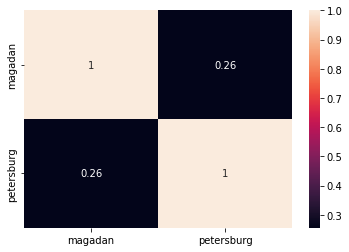

In [92]:
midii.corr()

sns.heatmap(midii.corr(), annot=True) # визуализируем данные корреляции

0.26 - нет зависимости или она очень слабая

3. Гипотеза

In [86]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в Санкт-Петербурге и Магадане.'
Ha = 'Есть значимая разница между средним размером раковины мидий в Санкт-Петербурге и Магадане.'

Зависимая переменная (средний размер раковины мидии) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [90]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(midii['magadan'], midii['petersburg'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(midii)


*** Результаты независимого T-теста ***
0.01 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в Санкт-Петербурге и Магадане.


По результатам теста можно сделать вывод, что значимая разница между средним размером раковины мидии в СПб и Магадане есть.